In [2]:
#Importng libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Data import and processing

##### TEMPERATURE
Daily average temperature data from two stations Line 6(l6) and Kunalin(kun) in the Satopanth catchment is used to derive the altitudinal lapse rate(°C/km) over the catchmet.
Line 6= 4376 m asl
Kunalin= 3870 m asl
Using the daily lapse rate values, the daily 0°C isotherm elevation is cauculated to partition precipitation into rainfall/snowfall. Any precipitation above the  0°C isotherm is as snowfall and vice-versa.

In [3]:
# Daily Temperature
temp=pd.read_csv('temp hourly.csv')
temp['day']=temp['day'].astype('datetime64')
temp.index=temp['day']
temp.drop(['day'],axis=1,inplace=True)

# Lapse rate
temp["lapse_rate"]=(temp["l6"]-temp["kun"])*-1000/(4376-3870)

temp.head()

,l6,kun,lapse_rate
day,,,
2017-06-01 00:00:00,0.463935,4.300,7.581156
2017-06-01 01:00:00,0.404402,4.250,7.599995
2017-06-01 02:00:00,-0.161156,3.775,7.778965
2017-06-01 03:00:00,-0.309988,3.650,7.826062
2017-06-01 04:00:00,-0.339754,3.625,7.835482


In [15]:
# 0°C isotherm
temp["0_deg_el"]=4376+((temp["l6"]-0)/temp["lapse_rate"])*1000
temp.head()

,l6,kun,lapse_rate,0_deg_el
day,,,,
2017-06-01 00:00:00,0.463935,4.300,7.581156,4437.195811
2017-06-01 01:00:00,0.404402,4.250,7.599995,4429.210890
2017-06-01 02:00:00,-0.161156,3.775,7.778965,4355.283073
2017-06-01 03:00:00,-0.309988,3.650,7.826062,4336.390361
2017-06-01 04:00:00,-0.339754,3.625,7.835482,4332.639073


##### Hypsometry
Area-elevation values for the different attributes of catchment is obtained from DEM

In [7]:
elevation_hist=pd.read_csv('hypsometry.csv')
elevation_hist.index=elevation_hist['elevation']
elevation_hist.head()

,elevation,catchment,glacier,ice_free
elevation,,,,
3850,3850,259200,259200,0
3950,3950,1142100,918900,223200
4050,4050,1912500,862200,1050300
4150,4150,2233800,918000,1315800
4250,4250,2542500,1152900,1389600


In [8]:
#glacial and off glacial area proportion over the catchment
ice_free_proportion=elevation_hist['ice_free']/elevation_hist['catchment']
glacier_proportion=1-ice_free_proportion

In [28]:
#Observed volumetric discharge values
discharge=pd.read_csv('discharge hourly.csv')
discharge['day']=discharge['day'].astype('datetime64')
discharge.index=discharge['day']
discharge.drop(['day'],axis=1,inplace=True)
discharge.head()

,value
day,
2017-06-01 00:00:00,23446.58
2017-06-01 01:00:00,23168.47
2017-06-01 02:00:00,23292.17
2017-06-01 03:00:00,22692.38
2017-06-01 04:00:00,22410.00


##### PRECIPITATION
Daily values of precipitation at Station Line 6 is used to model the approximate precipitation over the entire catchment.

In [4]:
ppt=pd.read_csv('ppt hourly.csv')
ppt['day']=ppt['day'].astype('datetime64')
ppt.index=ppt['day']
ppt.drop(['day'],axis=1,inplace=True)
ppt=ppt.loc['2017-06-01':'2017-10-05']
ppt.head()

,value
day,
2017-06-01 00:00:00,0.0
2017-06-01 01:00:00,0.0
2017-06-01 02:00:00,0.0
2017-06-01 03:00:00,0.0
2017-06-01 04:00:00,0.0


The following code blocks:
1. Finds the amount of precipitation m water equivalent (snow/rain) over the elevation bands. If thhe catchment has a significant altitudinal precipitation gradient, then it can be incorporated here. In out catchment we have incorporated a 0 gradient.

2. Calculates the volumetric precipitation as rain/snow over the elevation bands utilising the area. Determines the amount of total volumetric rainfall over the glacier and off glacier regions over the time step. And finally determines the volumetric snowfall distribution over the elevation bands.

In [9]:
#Precipitation over elevation bands
ppt_grad=-0
elevation_bands=elevation_hist['elevation']
ppt_elevation=pd.DataFrame(columns=elevation_bands,index=ppt.index)
x=np.array((elevation_bands-4376)*ppt_grad)
y=ppt['value']
for i in ppt_elevation.index:
    ppt_elevation.loc[i]=y[i]+x

stack=ppt_elevation.stack()
stack[stack<0]=0
ppt_elevation=stack.unstack()

ppt_elevation=ppt_elevation/1000

ppt_elevation.head()

elevation,3850,3950,4050,4150,4250,4350,4450,4550,4650,4750,...,6150,6250,6350,6450,6550,6650,6750,6850,6950,7050
day,,,,,,,,,,,,,,,,,,,,,
2017-06-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#Hourly volumetric Rainfall/Snowfall over catchment and volumetric snowfall over different elevation bands

precipitation_catchment=pd.DataFrame(index=ppt_elevation.index,columns=['rainfall','snowfall'], dtype='float64')
precipitation_ice_free=pd.DataFrame(index=ppt_elevation.index,columns=['rainfall','snowfall'], dtype='float64')
snowfall_catchment=pd.DataFrame(index=ppt_elevation.index,columns=elevation_bands, dtype='float64')
rainfall=pd.DataFrame(index=ppt_elevation.index,columns=['ice_free','glacier'], dtype='float64')

for j in precipitation_catchment.index:
    r=[i for i in elevation_hist['elevation'] if i<temp.loc[j]['0_deg_el']]
    s=[i for i in elevation_hist['elevation'] if i not in r]
    precipitation_catchment.loc[j]['rainfall']=(ppt_elevation.loc[j][r]*elevation_hist.loc[r]['catchment']).sum()
    precipitation_catchment.loc[j]['snowfall']=(ppt_elevation.loc[j][s]*elevation_hist.loc[s]['catchment']).sum()

    precipitation_ice_free.loc[j]['rainfall']=(ppt_elevation.loc[j][r]*elevation_hist.loc[r]['ice_free']).sum()
    precipitation_ice_free.loc[j]['snowfall']=(ppt_elevation.loc[j][s]*elevation_hist.loc[s]['ice_free']).sum()
    rainfall['ice_free'].loc[j]=(ppt_elevation.loc[j][r]*elevation_hist.loc[r]['ice_free']).sum()
    rainfall['glacier'].loc[j]=(ppt_elevation.loc[j][r]*elevation_hist.loc[r]['glacier']).sum()

    for k in s:
        snowfall_catchment.loc[j][k]=(ppt_elevation.loc[j][k]*elevation_hist.loc[k]['catchment'])

precipitation_glacier=precipitation_catchment-precipitation_ice_free
snowfall_catchment.replace(np.NaN,0, inplace=True)

#Winter Snowfall addition (635 mm)
precipitation_catchment.iloc[0,1]=0.635*elevation_hist['catchment'].sum()
snowfall_catchment.iloc[0,:]=snowfall_catchment.iloc[0,:]+0.635*elevation_hist['catchment']

snowfall_ice_free=snowfall_catchment*ice_free_proportion
snowfall_glacier=snowfall_catchment-snowfall_ice_free

precipitation_catchment.head()

,rainfall,snowfall
day,,
2017-06-01 00:00:00,0.0,47546514.0
2017-06-01 01:00:00,0.0,0.0
2017-06-01 02:00:00,0.0,0.0
2017-06-01 03:00:00,0.0,0.0
2017-06-01 04:00:00,0.0,0.0


In [18]:
snowfall_catchment.head()

elevation,3850,3950,4050,4150,4250,4350,4450,4550,4650,4750,...,6150,6250,6350,6450,6550,6650,6750,6850,6950,7050
day,,,,,,,,,,,,,,,,,,,,,
2017-06-01 00:00:00,164592.0,725233.5,1214437.5,1418463.0,1614487.5,2704909.5,3369564.0,3963352.5,4128516.0,3575875.5,...,492633.0,276034.5,239458.5,160020.0,118300.5,94297.5,83439.0,79438.5,54864.0,36576.0
2017-06-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
rainfall.head()

,ice_free,glacier
day,,
2017-06-01 00:00:00,0.0,0.0
2017-06-01 01:00:00,0.0,0.0
2017-06-01 02:00:00,0.0,0.0
2017-06-01 03:00:00,0.0,0.0
2017-06-01 04:00:00,0.0,0.0


# Temperature Index Melt Model

We first find the temperature distribution with elevation over the catchment using the calculated lapse rate values. Then using a degree day factor(DDF) of 5.28 mm/day/°C (Azam et al., 2017) we model our snowmelt.
We do the same for glacial ice(clean + sub-debris) melts using DDF values calibrated for our glacier. Ice melting starts only when the snow covering over the elevation band has melted away.

In [21]:
ddf_snow=5.28/24000 #Since our time-step is hourly we divide it by 24 * 1000 to convert it to m/hour/°C units.
#ddf_ice=3.7/24000
ddf_ice=5.5/24000

In [20]:
#Elevation-temperature distribution
temp_elevation=pd.DataFrame(columns=elevation_bands,index=temp.index)
for i in temp_elevation.index:
    temp_elevation.loc[i]= temp.loc[i]['l6'] + (4376-elevation_bands)*temp.loc[i]['lapse_rate']/1000

temp_elevation.head()

elevation,3850,3950,4050,4150,4250,4350,4450,4550,4650,4750,...,6150,6250,6350,6450,6550,6650,6750,6850,6950,7050
day,,,,,,,,,,,,,,,,,,,,,
2017-06-01 00:00:00,4.451623,3.693508,2.935392,2.177276,1.419161,0.661045,-0.097071,-0.855186,-1.613302,-2.371417,...,-12.985036,-13.743152,-14.501267,-15.259383,-16.017498,-16.775614,-17.533730,-18.291845,-19.049961,-19.808076
2017-06-01 01:00:00,4.402000,3.642000,2.882001,2.122001,1.362002,0.602002,-0.157997,-0.917997,-1.677996,-2.437996,...,-13.077989,-13.837988,-14.597988,-15.357987,-16.117987,-16.877986,-17.637986,-18.397985,-19.157985,-19.917984
2017-06-01 02:00:00,3.930579,3.152683,2.374786,1.596890,0.818993,0.041097,-0.736800,-1.514696,-2.292593,-3.070489,...,-13.961040,-14.738937,-15.516833,-16.294729,-17.072626,-17.850522,-18.628419,-19.406315,-20.184212,-20.962108
2017-06-01 03:00:00,3.806521,3.023915,2.241309,1.458703,0.676096,-0.106510,-0.889116,-1.671722,-2.454329,-3.236935,...,-14.193422,-14.976028,-15.758634,-16.541241,-17.323847,-18.106453,-18.889059,-19.671666,-20.454272,-21.236878
2017-06-01 04:00:00,3.781710,2.998161,2.214613,1.431065,0.647517,-0.136031,-0.919579,-1.703128,-2.486676,-3.270224,...,-14.239898,-15.023446,-15.806995,-16.590543,-17.374091,-18.157639,-18.941187,-19.724736,-20.508284,-21.291832


#### Snow melt

In [22]:
#Max possible snow melt m we
max_snow_melt=temp_elevation*ddf_snow
max_snow_melt[max_snow_melt<0]=0
max_snow_melt.head()

elevation,3850,3950,4050,4150,4250,4350,4450,4550,4650,4750,...,6150,6250,6350,6450,6550,6650,6750,6850,6950,7050
day,,,,,,,,,,,,,,,,,,,,,
2017-06-01 00:00:00,0.000979,0.000813,0.000646,0.000479,0.000312,0.000145,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-06-01 01:00:00,0.000968,0.000801,0.000634,0.000467,0.000300,0.000132,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-06-01 02:00:00,0.000865,0.000694,0.000522,0.000351,0.000180,0.000009,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-06-01 03:00:00,0.000837,0.000665,0.000493,0.000321,0.000149,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2017-06-01 04:00:00,0.000832,0.000660,0.000487,0.000315,0.000142,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#Volumetric hourly snowmelts

#snow melt (glacier)------------------------------------------------------------------------
snowfall=snowfall_glacier.copy()

snow_left=pd.DataFrame(index=snowfall.index,columns=snowfall.columns)
snow_left.iloc[0]=snowfall.iloc[0]
snow_melt_vol=pd.DataFrame(index=snowfall.index,columns=['melt'])
max_melt=max_snow_melt*elevation_hist['glacier']

for j in snowfall.index:
  snow_melt_vol.loc[j]=np.minimum(max_melt.loc[j],snow_left.loc[j]).sum()
  snow_left.loc[j]=snow_left.loc[j]-max_melt.loc[j]
  snow_left.loc[j][snow_left.loc[j]<0]=0
  if j !=snowfall.index[-1]: snow_left.loc[j+datetime.timedelta(hours=1)]=snow_left.loc[j]+snowfall.loc[j+datetime.timedelta(hours=1)]

snowmelt_glacier_vol= snow_melt_vol.copy()
snow_left_glacier= snow_left.copy()

#snow melt (off glacier)-------------------------------------------------------------------
snowfall=snowfall_ice_free.copy()

snow_left=pd.DataFrame(index=snowfall.index,columns=snowfall.columns)
snow_left.iloc[0]=snowfall.iloc[0]
snow_melt_vol=pd.DataFrame(index=snowfall.index,columns=['melt'])
max_melt=max_snow_melt*elevation_hist['ice_free']

for j in snowfall.index:
  snow_melt_vol.loc[j]=np.minimum(max_melt.loc[j],snow_left.loc[j]).sum()
  snow_left.loc[j]=snow_left.loc[j]-max_melt.loc[j]
  snow_left.loc[j][snow_left.loc[j]<0]=0
  if j !=snowfall.index[-1]: snow_left.loc[j+datetime.timedelta(hours=1)]=snow_left.loc[j]+snowfall.loc[j+datetime.timedelta(hours=1)]

snowmelt_ice_free_vol= snow_melt_vol.copy().astype('float')
snow_left_ice_free= snow_left.copy()

Text(0, 0.5, 'Temperature')

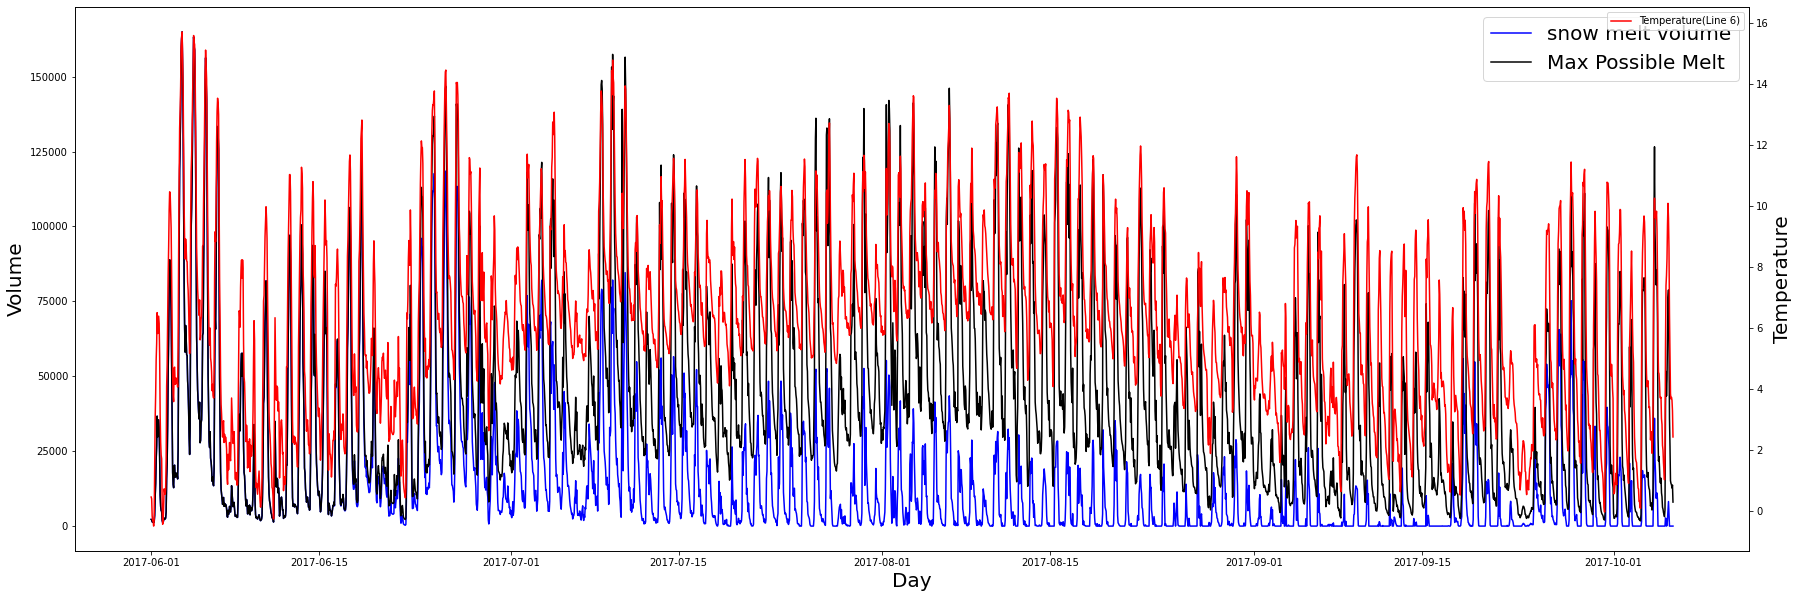

In [16]:
#Demonstration of the time-temp index model results
fig,ax1=plt.subplots(figsize=(30,10))
sns.lineplot(data=snowmelt_ice_free_vol['melt'], color='blue', label= 'snow melt volume',ax=ax1)
sns.lineplot(data=max_melt.sum(axis=1),color='black',label='Max Possible Melt',ax=ax1)
ax2=ax1.twinx()
sns.lineplot(data=temp['l6'],color='red',label='Temperature(Line 6)',ax=ax2)

ax1.legend(fontsize=20)
ax1.set_xlabel('Day', fontsize=20)
ax1.set_ylabel('Volume', fontsize=20)
ax2.set_ylabel('Temperature', fontsize=20)

#### Ice melt

In [25]:
ice_melt=temp_elevation*ddf_ice
ice_melt[ice_melt<0]=0

ice_melt_elev=pd.DataFrame(index=ice_melt.index,columns=ice_melt.columns)
ice_melt_vol=pd.DataFrame(index=ice_melt.index,columns=['melt'])

for i in snow_left_glacier.index:
  for j in elevation_bands:
    if snow_left_glacier.loc[i,j]==0:
      ice_melt_elev.loc[i,j]=elevation_hist.loc[j]['glacier']*ice_melt.loc[i,j]

ice_melt_vol['melt']= ice_melt_elev.sum(axis=1)

In [29]:
hourly_melt=pd.DataFrame(index=snowmelt_glacier_vol.index,columns=['snow','ice'])
hourly_melt['snow']=(snowmelt_glacier_vol+snowmelt_ice_free_vol).astype('float64')
hourly_melt['ice']=ice_melt_vol

calc_discharge=pd.concat([precipitation_catchment['rainfall'],hourly_melt],axis=1)
#calc_discharge['total']=calc_discharge.sum(axis=1)
calc_discharge.head()

,rainfall,snow,ice
day,,,
2017-06-01 00:00:00,0.0,4900.240852,0.0
2017-06-01 01:00:00,0.0,4747.538332,0.0
2017-06-01 02:00:00,0.0,3296.864393,0.0
2017-06-01 03:00:00,0.0,3014.922124,0.0
2017-06-01 04:00:00,0.0,2966.236319,0.0


<AxesSubplot:xlabel='day', ylabel='value'>

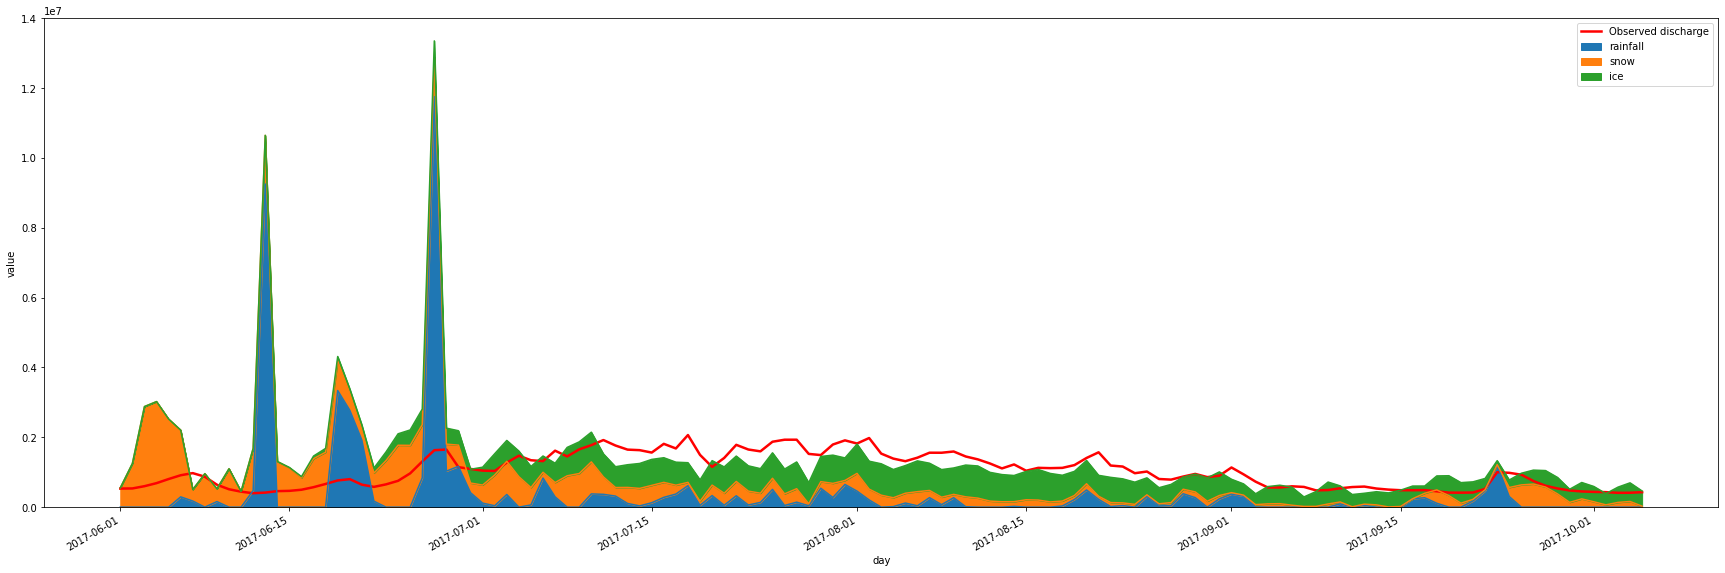

In [31]:
#Daily no reservoir
fig, ax=plt.subplots(figsize=(30,10))
sns.lineplot(data=discharge.resample('D').sum()['value'], color='red', label='Observed discharge', linewidth=2.5, ax=ax)
calc_discharge.resample('D').sum().plot.area(ax=ax)

# Linear Reservoir Model

We incorporate 3 linear reservoirs in parallel. Snow over ice-free catchment, snow over glacial ice and glacial ice. Using reservoir constants determined via recession analysis(during peak ablation period), we model the storage over the entire catchment. It is to be noted that the number of reservoirs and reservoir constants change throughout the melt seasosn, but for the sake of simplcity in this demonstration, we have fixed these parameters, hence, the actual observed values will not match exactly with the modelled values, but it should clearly show the effect of reservoir storage when results are plottedd against a no-reservoir model. 

In [32]:
hourly_melt=pd.DataFrame(index=snowmelt_glacier_vol.index,columns=['snow','ice','off_glacier'])
hourly_melt['off_glacier']=(rainfall['ice_free']+snowmelt_ice_free_vol['melt']).astype('float64')
hourly_melt['snow']=snowmelt_glacier_vol
hourly_melt['ice']=(rainfall['ice_free']+ice_melt_vol['melt']).astype('float64')

In [33]:
hourly_melt.head()

,snow,ice,off_glacier
day,,,
2017-06-01 00:00:00,2673.216921,0.0,2227.023932
2017-06-01 01:00:00,2595.942117,0.0,2151.596215
2017-06-01 02:00:00,1861.831483,0.0,1435.032910
2017-06-01 03:00:00,1719.595393,0.0,1295.326731
2017-06-01 04:00:00,1695.080057,0.0,1271.156262


In [34]:
#3 reservoir model
k_snow=96 #reservoir constants in hrs
k_ice=26
k_off_glacier=24
mod_q=pd.DataFrame(index=hourly_melt.index,columns=['snow','ice','off_glacier'],dtype='float64')
mod_q.iloc[0]=[0,0,0] #assuming initially empty reservoirs

for i in mod_q.index[1:]:
    mod_q.loc[i]['snow']= mod_q.loc[i-datetime.timedelta(hours=1)]['snow']*np.exp(-1/k_snow) + hourly_melt.loc[i]['snow']*(1-np.exp(-1/k_snow))
    mod_q.loc[i]['ice']= mod_q.loc[i-datetime.timedelta(hours=1)]['ice']*np.exp(-1/k_ice) + (hourly_melt['ice']).loc[i]*(1-np.exp(-1/k_ice))
    mod_q.loc[i]['off_glacier']= mod_q.loc[i-datetime.timedelta(hours=1)]['off_glacier']*np.exp(-1/k_off_glacier) + hourly_melt['off_glacier'].loc[i]*(1-np.exp(-1/k_off_glacier))

#mod_q['rain']=  precipitation_catchment['rainfall']
mod_q['value']=mod_q['snow']+mod_q['ice']+mod_q['off_glacier']

In [35]:
mod_q.head()

,snow,ice,off_glacier,value
day,,,,
2017-06-01 00:00:00,0.000000,0.0,0.000000,0.000000
2017-06-01 01:00:00,26.900713,0.0,87.807810,114.708522
2017-06-01 02:00:00,45.915368,0.0,142.788797,188.704166
2017-06-01 03:00:00,63.259047,0.0,189.824496,253.083543
2017-06-01 04:00:00,80.168957,0.0,233.954233,314.123189


<AxesSubplot:xlabel='day', ylabel='value'>

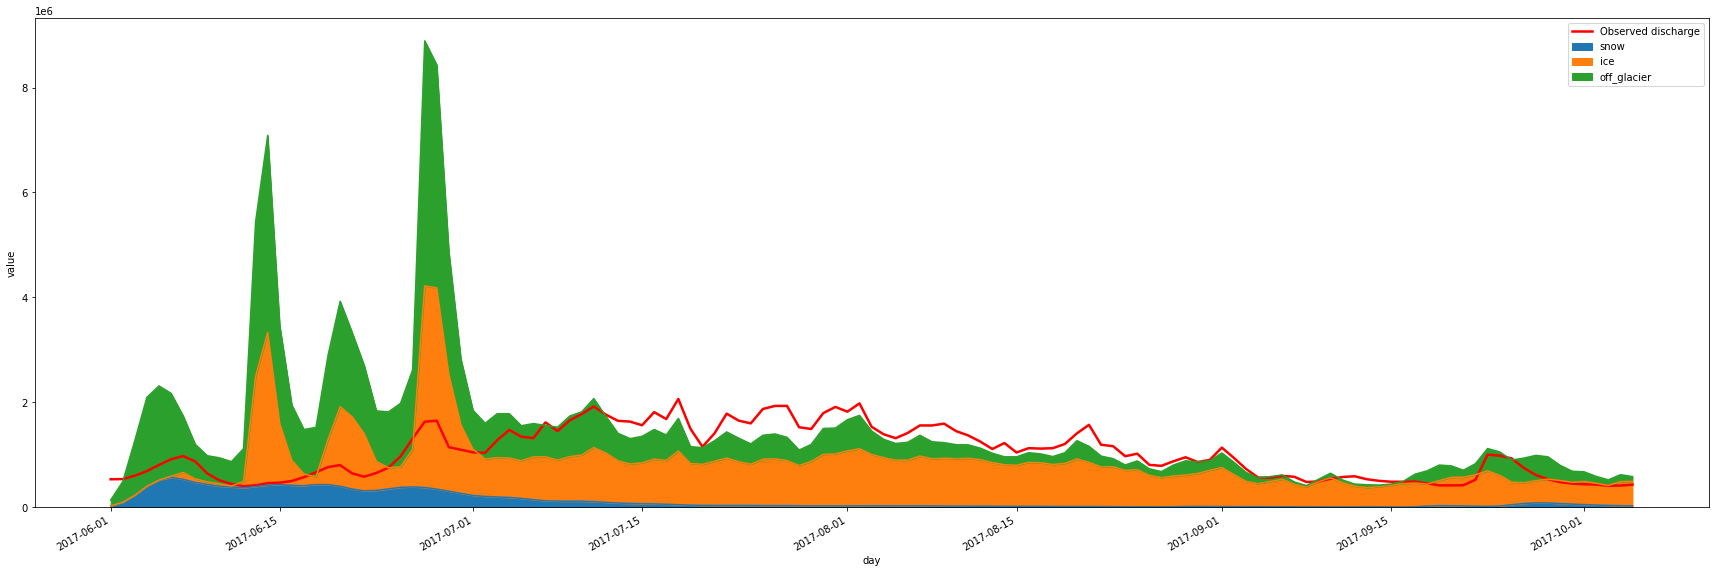

In [36]:
#Daily values plot
fig, ax=plt.subplots(figsize=(30,10))
sns.lineplot(data=discharge.resample('D').sum()['value'], color='red', label='Observed discharge', linewidth=2.5, ax=ax)
mod_q.drop(['value'],axis=1).resample('D').sum().plot.area(ax=ax)

(0.0, 200000.0)

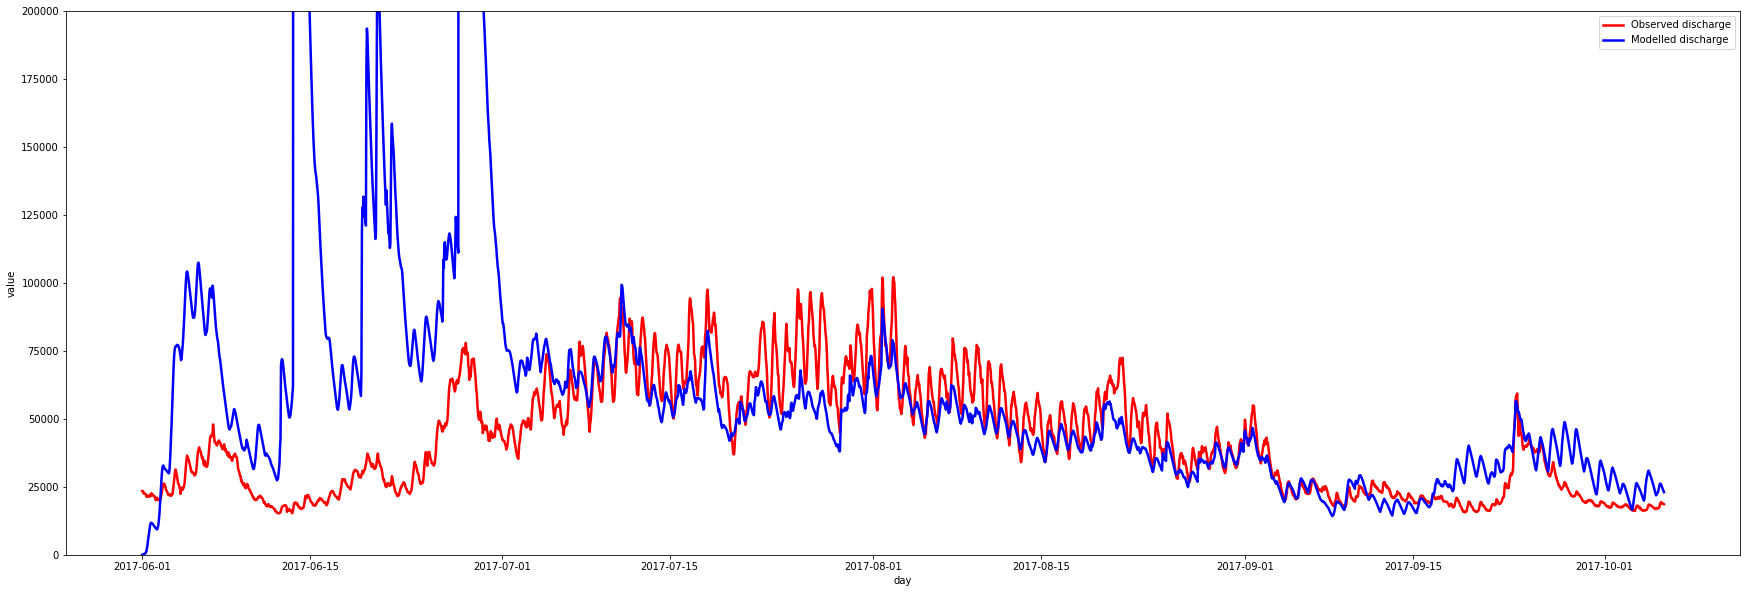

In [39]:
#Hourly data plot
fig, ax=plt.subplots(figsize=(30,10))
sns.lineplot(data=discharge['value'], color='red', label='Observed discharge', linewidth=2.5, ax=ax)
sns.lineplot(data=mod_q['value'], color='blue', label='Modelled discharge', linewidth=2.5, ax=ax)
plt.ylim((0,2e5))

<AxesSubplot:xlabel='day', ylabel='value'>

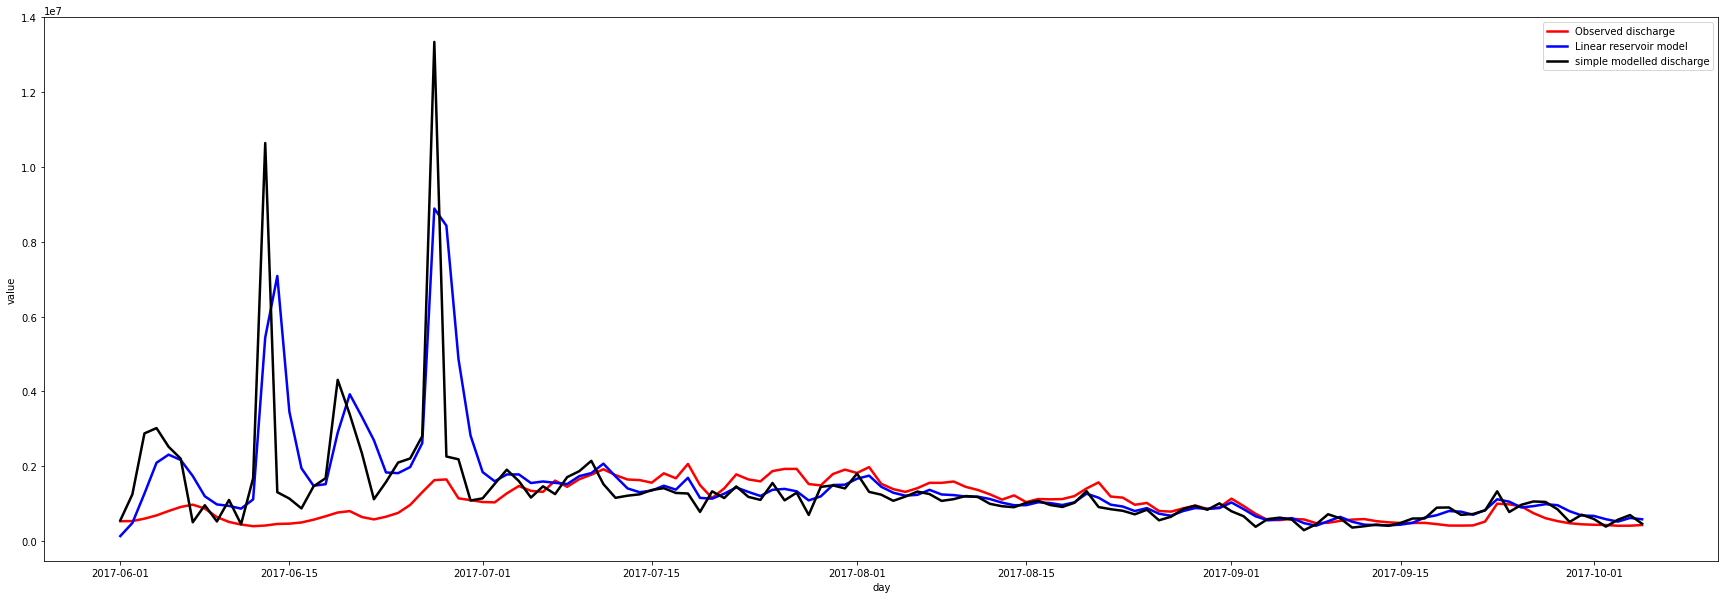

In [40]:
#Comparison plot (daily)
fig, ax=plt.subplots(figsize=(30,10))
sns.lineplot(data=discharge.resample('D').sum()['value'], color='red', label='Observed discharge', linewidth=2.5, ax=ax)
sns.lineplot(data=mod_q.resample('D').sum()['value'], color='blue', label='Linear reservoir model', linewidth=2.5, ax=ax)
sns.lineplot(data=calc_discharge.sum(axis=1).resample('D').sum(), color='black', label='simple modelled discharge', linewidth=2.5, ax=ax)

### Further work
Try fine tuning initial reservoir storages to see it's effect on final result
Try incorporating on-linear behaviour in storage (diff values of storage constants and number or reservoirs throughout the melt season)